In [19]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler

In [20]:
# Import file in jupitar to read the dataset.
df=pd.read_csv(r"C:\Users\Khushboo\Downloads\cricket_data.csv")
df

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,Mayank Markande,2,0,0,0,0,0,0,0,...,2,42,57,1,1/26,57.00,8.14,42.00,0,0
1168,2021,Mayank Markande,1,0,0,0,0.00,0,0.00,0,...,1,18,26,0,0/26,0,8.66,0,0,0
1169,2019,Mayank Markande,3,1,6,6,6.00,5,120.00,0,...,3,36,59,1,1/23,59.00,9.83,36.00,0,0
1170,2018,Mayank Markande,14,4,21,7*,10.50,24,87.50,0,...,14,264,368,15,4/23,24.53,8.36,17.60,1,0


In [65]:
# 1.Identify and handle any missing values in the dataset

# Check for missing values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing == 0:
    print("No missing values found.")
else:
    print("Missing values detected:\n", missing_values[missing_values > 0])
    df = df.fillna(df.mean(numeric_only=True))  # or df.dropna()


Missing values detected:
 Year                   42
Matches_Batted         41
Not_Outs               41
Runs_Scored            41
Highest_Score          41
Batting_Average        41
Balls_Faced            41
Batting_Strike_Rate    41
Centuries              41
Half_Centuries         41
Fours                  41
Sixes                  41
Catches_Taken          41
Stumpings              41
Matches_Bowled         42
Balls_Bowled           42
Runs_Conceded          42
Wickets_Taken          42
Bowling_Average        42
Economy_Rate           42
Bowling_Strike_Rate    42
Four_Wicket_Hauls      42
Five_Wicket_Hauls      42
Boundary_Runs          41
Total_Boundaries       41
dtype: int64


In [67]:
# 2.Are there any inconsistencies in the dataset (e.g., mismatched data types, outliers)?
# Convert columns to numeric where ever possible.
for col in df.columns.difference(['Player_Name', 'Year', 'Best_Bowling_Match']):
    df[col] = df[col].replace('-', np.nan)
    df[col] = df[col].astype(str).str.replace('*', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Detect outliers using IQR method
def detect_outliers_iqr(data):
    outlier_indices = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        if not outliers.empty:
            outlier_indices[col] = len(outliers)
    return outlier_indices

outliers_detected = detect_outliers_iqr(df)
print("Outliers found in:\n", outliers_detected)


Outliers found in:
 {'Year': 27, 'Not_Outs': 35, 'Runs_Scored': 33, 'Highest_Score': 1, 'Batting_Average': 12, 'Balls_Faced': 33, 'Batting_Strike_Rate': 9, 'Centuries': 78, 'Half_Centuries': 136, 'Fours': 75, 'Sixes': 74, 'Catches_Taken': 30, 'Stumpings': 115, 'Balls_Bowled': 3, 'Wickets_Taken': 66, 'Bowling_Average': 34, 'Economy_Rate': 1, 'Bowling_Strike_Rate': 20, 'Four_Wicket_Hauls': 120, 'Five_Wicket_Hauls': 62, 'Boundary_Runs': 45, 'Batting_Impact_Score': 19, 'AllRounder_Score': 4, 'Total_Boundaries': 45}


In [23]:
# 3.Convert all numerical columns to appropriate data types for analysis.
print(df.dtypes)  # To confirm numeric types


Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match      object
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object


In [24]:
# 4.Normalize or standardize relevant numerical features for better comparison.
from sklearn.preprocessing import MinMaxScaler
# Normalize and Standardize selected numerical features.
features_to_scale = [
    'Runs_Scored', 'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate',
    'Fours', 'Sixes', 'Catches_Taken', 'Stumpings',
    'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average',
    'Economy_Rate', 'Bowling_Strike_Rate'
]
# Drop rows with NaN in these features for scaling.
df_scaled = df.dropna(subset=features_to_scale).copy()
print(df_scaled)
# Normalize:
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df_scaled[features_to_scale]),
                             columns=[col + '_Norm' for col in features_to_scale])
print(df_normalized)

# Standardize:
standardizer = StandardScaler()
df_standardized = pd.DataFrame(standardizer.fit_transform(df_scaled[features_to_scale]),
                               columns=[col + '_Std' for col in features_to_scale])
print(df_standardized)

# Combine with original df:
df_scaled.reset_index(drop=True, inplace=True)
df_cleaned = pd.concat([df_scaled, df_normalized, df_standardized], axis=1)

        Year      Player_Name  Matches_Batted  Not_Outs  Runs_Scored  \
0     2024.0  Ruturaj Gaikwad             2.0       0.0         61.0   
1     2023.0  Ruturaj Gaikwad            16.0       1.0        590.0   
2     2022.0  Ruturaj Gaikwad            14.0       0.0        368.0   
3     2021.0  Ruturaj Gaikwad            16.0       2.0        635.0   
4     2020.0  Ruturaj Gaikwad             6.0       2.0        204.0   
...      ...              ...             ...       ...          ...   
1166  2023.0  Mayank Markande            10.0       3.0         21.0   
1167  2022.0  Mayank Markande             2.0       0.0          0.0   
1168  2021.0  Mayank Markande             1.0       0.0          0.0   
1169  2019.0  Mayank Markande             3.0       1.0          6.0   
1170  2018.0  Mayank Markande            14.0       4.0         21.0   

      Highest_Score  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0              46.0            30.50         51.0            

In [25]:
# 5.How would you handle data if there are duplicate records?
# Check and drop duplicates:
duplicates_count = df.duplicated().sum()
print(f"Found {duplicates_count} duplicate records.")

df_no_duplicates = df.drop_duplicates()
df_no_duplicates.reset_index(drop=True, inplace=True)


Found 0 duplicate records.


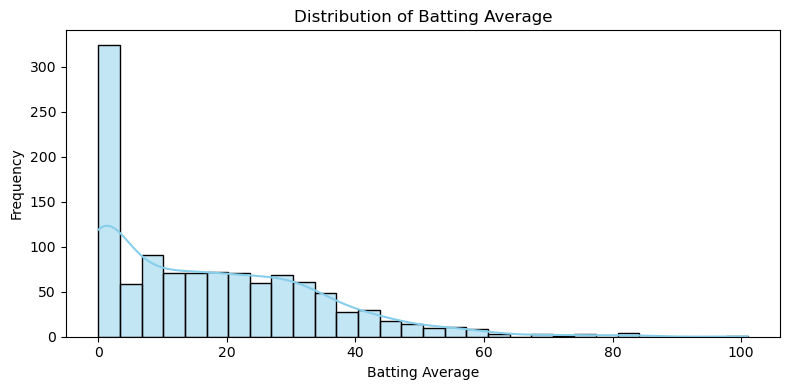

In [26]:
# 6.What is the distribution of the Batting Average for all players?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Batting_Average'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Batting Average")
plt.xlabel("Batting Average")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [27]:
# 7.Which player has the highest Batting Strike Rate across all seasons?
highest_strike = df.loc[df['Batting_Strike_Rate'].idxmax()]
print("Player with Highest Batting Strike Rate:")
print(f"{highest_strike['Player_Name']} - {highest_strike['Batting_Strike_Rate']}")


Player with Highest Batting Strike Rate:
Prerak Mankad - 400.0


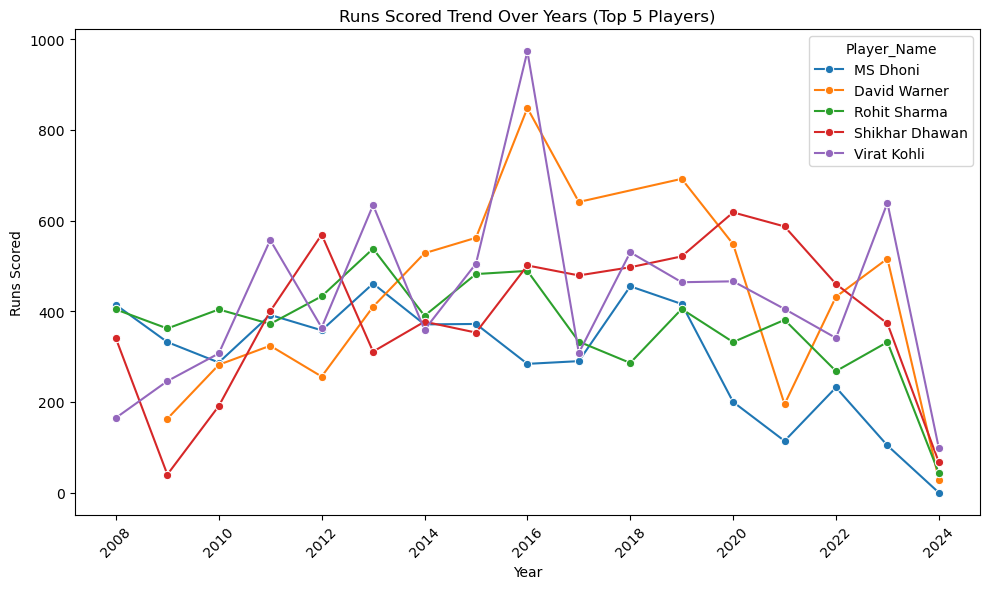

In [28]:
# 8.What is the trend in Runs Scored for each player over different years?

# Top 5 players by total runs
top_players = df.groupby('Player_Name')['Runs_Scored'].sum().sort_values(ascending=False).head(5).index
df_top_runs = df[df['Player_Name'].isin(top_players)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top_runs, x='Year', y='Runs_Scored', hue='Player_Name', marker='o')
plt.title("Runs Scored Trend Over Years (Top 5 Players)")
plt.xlabel("Year")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# 9. Identify the top 3 players with the most Centuries.
top_centuries = df.groupby('Player_Name')['Centuries'].sum().sort_values(ascending=False).head(3)
print("Top 3 Players with Most Centuries:\n")
print(top_centuries)


Top 3 Players with Most Centuries:

Player_Name
Virat Kohli     7.0
Jos Buttler     5.0
David Warner    4.0
Name: Centuries, dtype: float64


In [30]:
# 10. Which player has the highest Bowling Economy Rate?
highest_economy = df.loc[df['Economy_Rate'].idxmax()]
print("Player with Highest Bowling Economy Rate:")
print(f"{highest_economy['Player_Name']} - {highest_economy['Economy_Rate']}")




Player with Highest Bowling Economy Rate:
Yashasvi Jaiswal - 36.0


In [31]:
# Q11 Create a new feature called "Boundary Percentage", which calculates the
# percentage of runs scored from fours and sixes.

# Ensure numeric columns:
df['Fours'] = pd.to_numeric(df['Fours'], errors='coerce')
df['Sixes'] = pd.to_numeric(df['Sixes'], errors='coerce')
df['Runs_Scored'] = pd.to_numeric(df['Runs_Scored'], errors='coerce')

# Calculate Boundary Percentage:
df['Boundary_Runs'] = (df['Fours'] * 4) + (df['Sixes'] * 6)

# Apply boundary percentage safely:
df['Boundary_Percentage'] = df.apply(
    lambda row: (row['Boundary_Runs'] / row['Runs_Scored']) * 100 if row['Runs_Scored'] > 0 else 0,
    axis=1
)

# View result:
print("\nStep 10: Sample Boundary Percentage")
print(df[['Player_Name', 'Year', 'Runs_Scored', 'Fours', 'Sixes', 'Boundary_Percentage']].head())



Step 10: Sample Boundary Percentage
       Player_Name    Year  Runs_Scored  Fours  Sixes  Boundary_Percentage
0  Ruturaj Gaikwad  2024.0         61.0    8.0    1.0            62.295082
1  Ruturaj Gaikwad  2023.0        590.0   46.0   30.0            61.694915
2  Ruturaj Gaikwad  2022.0        368.0   33.0   14.0            58.695652
3  Ruturaj Gaikwad  2021.0        635.0   64.0   23.0            62.047244
4  Ruturaj Gaikwad  2020.0        204.0   16.0    6.0            49.019608


In [32]:
# Q12 Create a feature called "Batting Impact Score" based on runs, strike rate, and
# average.

# Make sure relevant columns are numeric
df['Batting_Strike_Rate'] = pd.to_numeric(df['Batting_Strike_Rate'], errors='coerce')
df['Batting_Average'] = pd.to_numeric(df['Batting_Average'], errors='coerce')

# Calculate score
df['Batting_Impact_Score'] = (
    df['Runs_Scored'] * 0.5 +
    df['Batting_Strike_Rate'] * 0.3 +
    df['Batting_Average'] * 0.2
)

df['Batting_Impact_Score'] = df['Batting_Impact_Score'].fillna(0)

df[['Player_Name', 'Year', 'Runs_Scored', 'Batting_Strike_Rate', 'Batting_Average', 'Batting_Impact_Score']].head()


,Player_Name,Year,Runs_Scored,Batting_Strike_Rate,Batting_Average,Batting_Impact_Score
0,Ruturaj Gaikwad,2024.0,61.0,119.61,30.50,72.483
1,Ruturaj Gaikwad,2023.0,590.0,147.50,42.14,347.678
2,Ruturaj Gaikwad,2022.0,368.0,126.46,26.29,227.196
3,Ruturaj Gaikwad,2021.0,635.0,136.26,45.35,367.448
4,Ruturaj Gaikwad,2020.0,204.0,120.71,51.00,148.413


In [33]:
# Q13. Generate a metric to evaluate a player's all-round performance considering both
# batting and bowling stats.
# Step 13 (Feature Engineering): All-Rounder Performance Metric

# Normalize both batting and bowling aspects
allround_features = df[['Batting_Impact_Score', 'Wickets_Taken', 'Bowling_Strike_Rate', 'Economy_Rate']].fillna(0)
allround_scaler = MinMaxScaler()
allround_scaled = pd.DataFrame(allround_scaler.fit_transform(allround_features),
                                columns=['Batting_Impact_Score_Norm', 'Wickets_Taken_Norm', 'Bowling_SR_Norm', 'Economy_Rate_Norm'])

# Since lower Bowling_SR and Economy_Rate are better, invert them (1 - value)
allround_scaled['Bowling_SR_Norm'] = 1 - allround_scaled['Bowling_SR_Norm']
allround_scaled['Economy_Rate_Norm'] = 1 - allround_scaled['Economy_Rate_Norm']

# Create a combined score
allround_scaled['AllRounder_Score'] = (
    0.4 * allround_scaled['Batting_Impact_Score_Norm'] +
    0.3 * allround_scaled['Wickets_Taken_Norm'] +
    0.15 * allround_scaled['Bowling_SR_Norm'] +
    0.15 * allround_scaled['Economy_Rate_Norm']
)

# Add it to df_cleaned
df['AllRounder_Score'] = allround_scaled['AllRounder_Score']

print("\n: Sample All-Rounder Score")
print(df[['Player_Name', 'Year', 'Batting_Impact_Score', 'Wickets_Taken', 'Bowling_Strike_Rate', 'Economy_Rate', 'AllRounder_Score']].head())


: Sample All-Rounder Score
       Player_Name    Year  Batting_Impact_Score  Wickets_Taken  \
0  Ruturaj Gaikwad  2024.0                72.483            0.0   
1  Ruturaj Gaikwad  2023.0               347.678            0.0   
2  Ruturaj Gaikwad  2022.0               227.196            0.0   
3  Ruturaj Gaikwad  2021.0               367.448            0.0   
4  Ruturaj Gaikwad  2020.0               148.413            0.0   

   Bowling_Strike_Rate  Economy_Rate  AllRounder_Score  
0                  0.0           0.0          0.352876  
1                  0.0           0.0          0.553629  
2                  0.0           0.0          0.465738  
3                  0.0           0.0          0.568051  
4                  0.0           0.0          0.408266  


In [40]:
# Q14. Categorize players into Aggressive, Balanced, and Defensive based on their strike
# rate.
# Step 14 (Feature Engineering): Categorize players as Aggressive, Balanced, or Defensive

def categorize_strike_rate(sr):
    if sr >= 140:
        return 'Aggressive'
    elif sr >= 120:
        return 'Balanced'
    else:
        return 'Defensive'

# Apply the function
df['Batting_Style'] = df['Batting_Strike_Rate'].apply(categorize_strike_rate)

print("\n Sample Batting Styles")
print(df[['Player_Name', 'Year', 'Batting_Strike_Rate', 'Batting_Style']].head())


 Sample Batting Styles
       Player_Name    Year  Batting_Strike_Rate Batting_Style
0  Ruturaj Gaikwad  2024.0               119.61     Defensive
1  Ruturaj Gaikwad  2023.0               147.50    Aggressive
2  Ruturaj Gaikwad  2022.0               126.46      Balanced
3  Ruturaj Gaikwad  2021.0               136.26      Balanced
4  Ruturaj Gaikwad  2020.0               120.71      Balanced


In [75]:
# Q15: Compute YoY Growth in Runs and Wickets per player
# Q15: Compute YoY Growth in Runs and Wickets per player
df_sorted = df.sort_values(by=['Player_Name', 'Year'])
df_sorted['Runs_Growth'] = df_sorted.groupby('Player_Name')['Runs_Scored'].pct_change() * 100
df_sorted['Wickets_Growth'] = df_sorted.groupby('Player_Name')['Wickets_Taken'].pct_change() * 100

# Show sample results
df_sorted[['Player_Name', 'Year', 'Runs_Scored', 'Runs_Growth',
           'Wickets_Taken', 'Wickets_Growth',
           'All_Rounder_Score', 'Strike_Rate_Category']].head(10)

KeyError: "['All_Rounder_Score', 'Strike_Rate_Category'] not in index"

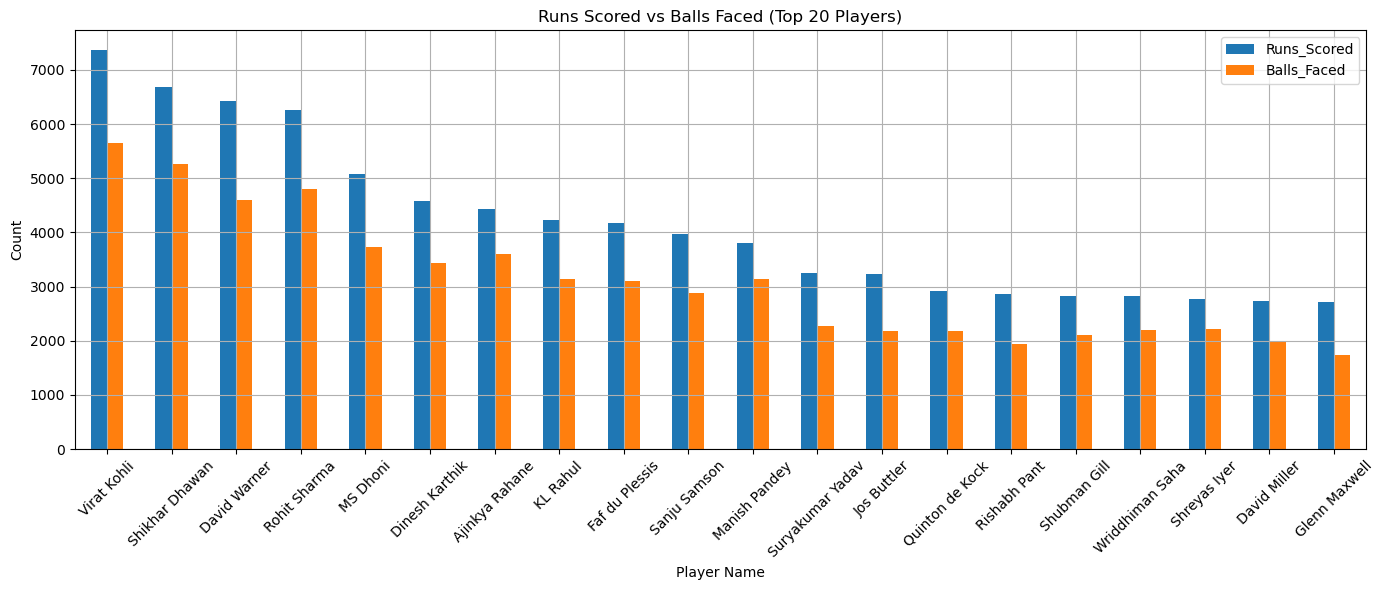

In [44]:
# Q16.Create a bar chart to show the Runs Scored vs. Balls Faced for all players
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate top 20 players:
runs_vs_balls = df.groupby('Player_Name')[['Runs_Scored', 'Balls_Faced']].sum().sort_values(by='Runs_Scored', ascending=False).head(20)

runs_vs_balls.plot(kind='bar', figsize=(14,6))
plt.title('Runs Scored vs Balls Faced (Top 20 Players)')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


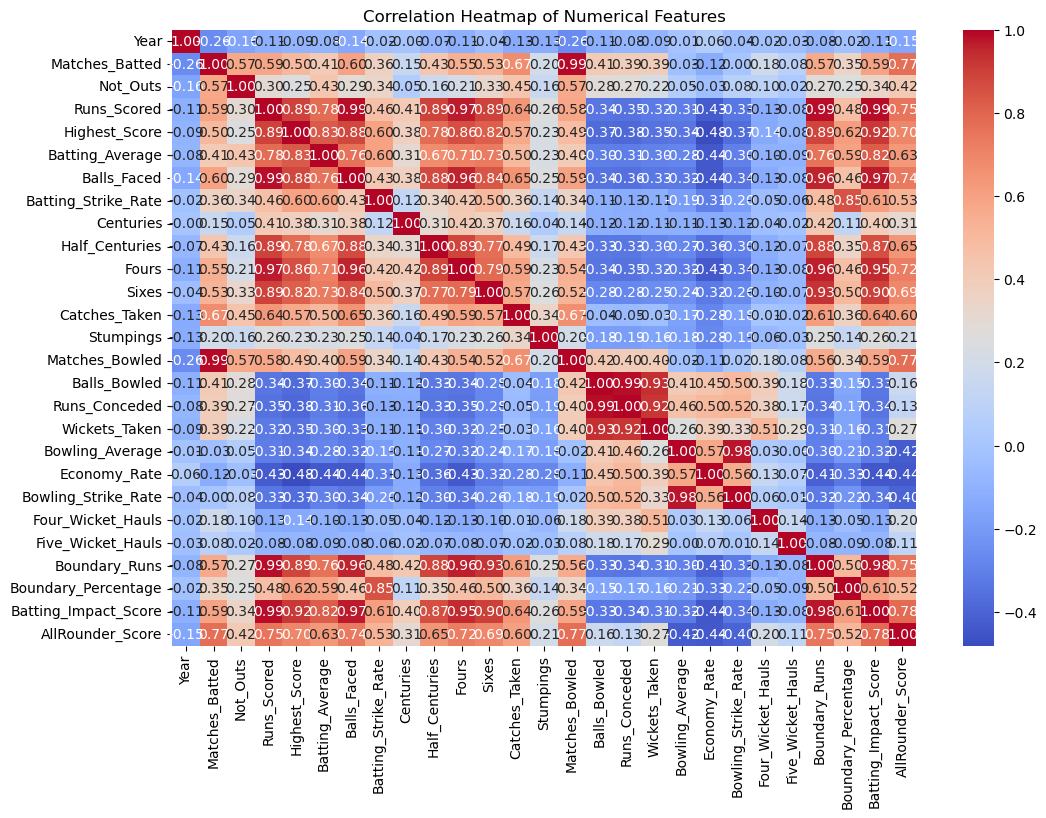

In [46]:
# Q17.Generate a heatmap showing the correlation between different numerical features.
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


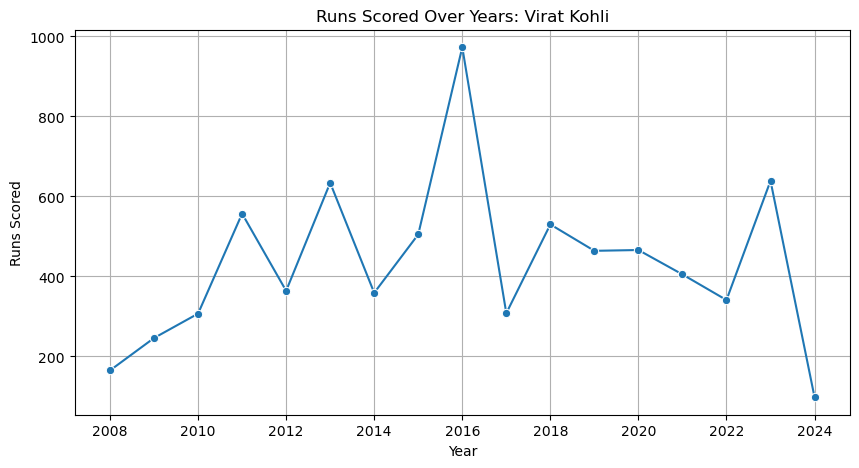

In [48]:
# Q18.Plot a trend line showing the performance of a single player over multiple years.
player_name = 'Virat Kohli'  # Change to any player in your dataset
player_data = df[df['Player_Name'] == player_name].sort_values('Year')

plt.figure(figsize=(10, 5))
sns.lineplot(data=player_data, x='Year', y='Runs_Scored', marker='o')
plt.title(f'Runs Scored Over Years: {player_name}')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()


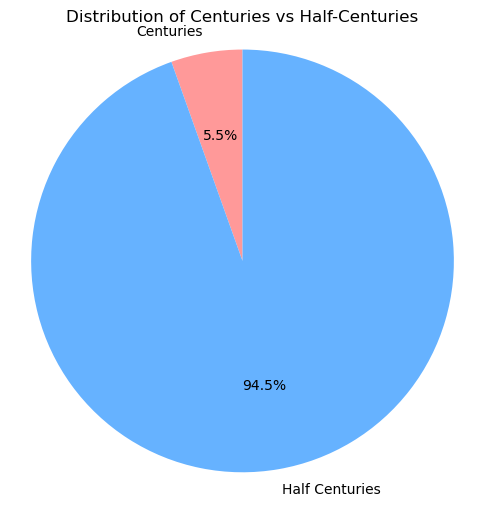

In [50]:
# Q19.Create a pie chart for the distribution of centuries and half-centuries across all
# players.
total_centuries = df['Centuries'].sum()
total_half_centuries = df['Half_Centuries'].sum()

plt.figure(figsize=(6, 6))
plt.pie([total_centuries, total_half_centuries],
        labels=['Centuries', 'Half Centuries'],
        autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'],
        startangle=90)
plt.title('Distribution of Centuries vs Half-Centuries')
plt.axis('equal')
plt.show()


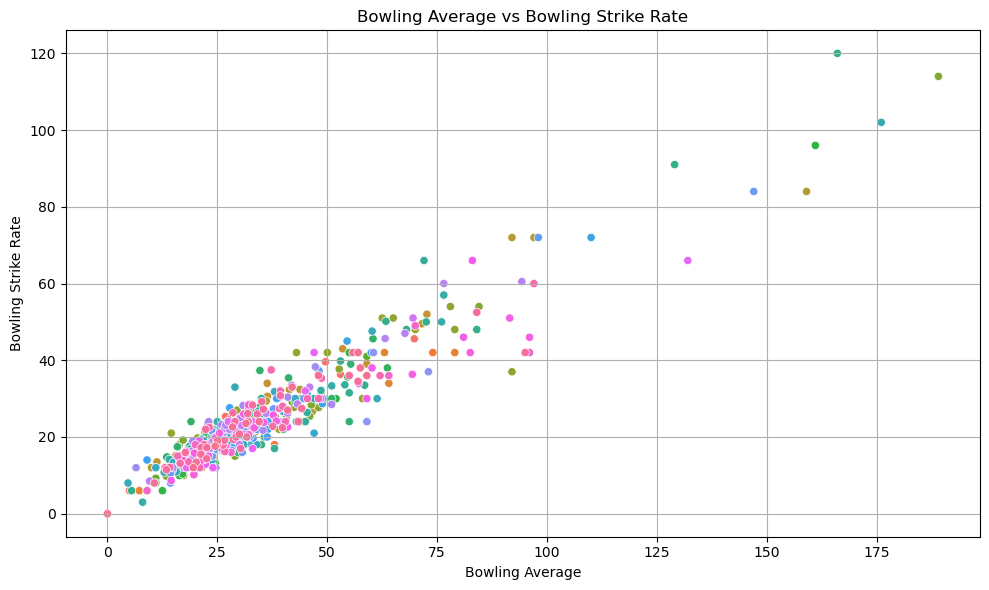

In [52]:
# Q20.Develop a visualization to compare Bowling Average vs. Bowling Strike Rate.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bowling_Average', y='Bowling_Strike_Rate', hue='Player_Name', legend=False)
plt.title('Bowling Average vs Bowling Strike Rate')
plt.xlabel('Bowling Average')
plt.ylabel('Bowling Strike Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
# Q21.Write a Python query to get the top 5 players with the highest Batting Average.
top5_avg = df[['Player_Name', 'Batting_Average']].dropna()
top5_avg = top5_avg.groupby('Player_Name').mean().sort_values(by='Batting_Average', ascending=False).head(5)
print("Top 5 Players with Highest Batting Average:\n", top5_avg)


Top 5 Players with Highest Batting Average:
                   Batting_Average
Player_Name                      
Devon Conway            46.845000
B. Sai Sudharsan        44.320000
KL Rahul                43.098182
Rachin Ravindra         41.500000
Phil Salt               40.625000


In [56]:
# Q22 Write a Python query to find out which player has played the most matches.
most_matches = df.groupby('Player_Name')['Matches_Batted'].sum().sort_values(ascending=False).head(1)
print("Player with Most Matches Played:\n", most_matches)


Player with Most Matches Played:
 Player_Name
MS Dhoni    252.0
Name: Matches_Batted, dtype: float64


In [58]:
# Q23.Retrieve all players who have scored more than 500 runs in a season.
high_scorers = df[df['Runs_Scored'] > 500][['Player_Name', 'Year', 'Runs_Scored']]
print("Players with more than 500 runs in a season:\n", high_scorers)


Players with more than 500 runs in a season:
           Player_Name    Year  Runs_Scored
1     Ruturaj Gaikwad  2023.0        590.0
3     Ruturaj Gaikwad  2021.0        635.0
5        Devon Conway  2023.0        672.0
33     Ajinkya Rahane  2015.0        540.0
36     Ajinkya Rahane  2012.0        560.0
121      Rishabh Pant  2018.0        684.0
125      David Warner  2023.0        516.0
128      David Warner  2020.0        548.0
129      David Warner  2019.0        692.0
130      David Warner  2017.0        641.0
131      David Warner  2016.0        848.0
132      David Warner  2015.0        562.0
133      David Warner  2014.0        528.0
223      Shubman Gill  2023.0        890.0
268   Kane Williamson  2018.0        735.0
363      Shreyas Iyer  2020.0        519.0
418     Andre Russell  2019.0        510.0
469          KL Rahul  2022.0        616.0
470          KL Rahul  2021.0        626.0
471          KL Rahul  2020.0        670.0
472          KL Rahul  2019.0        593.0
473     

In [60]:
# Q24.Identify players who have taken at least one five-wicket haul
five_wicket_players = df[df['Five_Wicket_Hauls'] >= 1][['Player_Name', 'Year', 'Five_Wicket_Hauls']]
print("Players with at least one 5-wicket haul:\n", five_wicket_players)


Players with at least one 5-wicket haul:
               Player_Name    Year  Five_Wicket_Hauls
55        Ravindra Jadeja  2012.0                1.0
208         Ishant Sharma  2011.0                1.0
350          Mohit Sharma  2023.0                1.0
416         Andre Russell  2021.0                1.0
452          Sunil Narine  2012.0                1.0
459   Varun Chakaravarthy  2020.0                1.0
575           Amit Mishra  2008.0                1.0
654        Jasprit Bumrah  2022.0                1.0
682         Akash Madhwal  2023.0                1.0
769        Arshdeep Singh  2021.0                1.0
793         Harshal Patel  2021.0                1.0
909      Yuzvendra Chahal  2022.0                1.0
920            Adam Zampa  2016.0                1.0
1021       Alzarri Joseph  2019.0                1.0
1110    Wanindu Hasaranga  2022.0                1.0
1127    Bhuvneshwar Kumar  2023.0                1.0
1133    Bhuvneshwar Kumar  2017.0                1.0
1148

In [62]:
# Q25.. Write a query to calculate the total number of boundaries hit by each player.
df['Total_Boundaries'] = df['Fours'] + df['Sixes']
total_boundaries = df.groupby('Player_Name')['Total_Boundaries'].sum().sort_values(ascending=False)
print("Total Boundaries by Each Player:\n", total_boundaries)


Total Boundaries by Each Player:
 Player_Name
Shikhar Dhawan      908.0
Virat Kohli         891.0
David Warner        877.0
Rohit Sharma        819.0
Dinesh Karthik      588.0
                    ...  
M. Siddharth          0.0
Shams Mulani          0.0
Shamar Joseph         0.0
Shaik Rasheed         0.0
Yuzvendra Chahal      0.0
Name: Total_Boundaries, Length: 247, dtype: float64
